In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
from collections import defaultdict

# Dummy scorer function
def crappy_scorer(x):
    # Simulates a scoring function based on input dict x and lambda
    return x["value"] * lambda_ + x.get("bias", 0)

def plot_all_score_subplots(d1, d2, lambdas, scorer, subplot_shape=(2, 2)):
    assert d1.keys() == d2.keys(), "d1 and d2 must have the same keys"
    keys = list(d1.keys())
    assert 0 <= len(keys) <= 4, "There must be at most 4 keys to fit in a 2x2 grid"

    fig, axes = plt.subplots(*subplot_shape, figsize=(6 * subplot_shape[1], 5 * subplot_shape[0]))
    axes = axes.flatten()

    for i, n in enumerate(keys):
        ax = axes[i]
        data = []

        for lambda_ in lambdas:
            scores1 = [scorer(x, lambda_) for x in d1[n]]
            scores2 = [scorer(x, lambda_) for x in d2[n]]
            data.extend([
                {"lambda": lambda_, "score": s, "group": "d1"} for s in scores1
            ])
            data.extend([
                {"lambda": lambda_, "score": s, "group": "d2"} for s in scores2
            ])

        import pandas as pd
        df = pd.DataFrame(data)

        sns.violinplot(data=df, x="lambda", y="score", hue="group", ax=ax, split=True)
        ax.set_title(f"Number of nodes = {n}")
        ax.legend(title="Dataset")

    plt.tight_layout()
    plt.show()


def plot_all_time_subplots(d1, d2):
    assert d1.keys() == d2.keys(), "d1 and d2 must have the same keys"
    keys = list(d1.keys())
    assert 0 <= len(keys) <= 4, "There must be at most 4 keys to fit in a 2x2 grid"

    fig = plt.figure(figsize=(6, 5))
    ax = plt.gca()
    
    data = []
    for i, n in enumerate(keys):
        times1 = [x['time'] for x in d1[n]]
        times2 = [x['time'] for x in d2[n]]
        data.extend([
            {"num_nodes": n, "time": t, "group": "Ordinary HP"} for t in times1
        ])
        data.extend([
            {"num_nodes": n, "time": t, "group": "Diffrentiable HP"} for t in times2
        ])

    df = pd.DataFrame(data)

    sns.violinplot(data=df, x="num_nodes", y="time", hue="group", split=True)
    ax.set_xlabel("Number of nodes")
    ax.set_ylabel("Time (s)")
    ax.set_title(f"Time")
    ax.legend(title="Dataset")

    plt.tight_layout()
    plt.show()


def plot_all_diff_len_subplots(d1, d2):
    assert d1.keys() == d2.keys(), "d1 and d2 must have the same keys"
    keys = list(d1.keys())
    assert 0 <= len(keys) <= 4, "There must be at most 4 keys to fit in a 2x2 grid"

    fig = plt.figure(figsize=(6, 5))
    ax = plt.gca()
    
    data = []
    for i, n in enumerate(keys):
        assert len(d1[n]) == len(d2[n]), "d1 and d2 must have the same number of elements for each key"
        diffs = [len(y['cause']['cf_X']) - len(x['cause']['cf_X']) for x,y in zip(d1[n],d2[n])]
        data.extend([
            {"num_nodes": n, "diff_len": d, "group": "Diffrentiable HP"} for d in diffs
        ])
        
    df = pd.DataFrame(data)

    sns.violinplot(data=df, x="num_nodes", y="diff_len", hue="group", split=True)
    ax.set_xlabel("Number of nodes")
    ax.set_ylabel("Diff")
    ax.set_title(f"Difference in Length of CF")
    ax.legend(title="Dataset")

    plt.tight_layout()
    plt.show()

In [44]:
import pickle
with open("results/results_20250509_173334.pkl", "rb") as f:
    data = pickle.load(f)
    print(data[8][0])

# {'adj': array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
#        [-3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
#        [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
#        [-3,  0,  3,  0,  0,  0,  0,  0,  0,  0],
#        [ 0, -2,  0,  0,  0,  0,  0,  0,  0,  0],
#        [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
#        [ 0,  1,  2,  0,  0,  0,  0,  0,  0,  0],
#        [ 0, -2,  3,  0,  0,  4,  0,  0,  0,  0],
#        [ 1,  0,  0,  0,  4,  0, -3,  0,  0,  0],
#        [ 0,  0,  3,  4,  0,  4,  0,  0,  0,  0]]), 'u': array([-0.66666667,  0.        ,  0.        ,  2.        ,  0.        ,
#         0.        ,  0.        ,  0.        , 25.33333333,  0.        ]), 'v': array([   0.57142857,   -1.71428571,   -0.57142857,    0.        ,
#          -4.        ,   16.        ,    0.57142857,   49.71428571,
#        -162.28571429,  101.71428571]), 'o': np.float64(16.0), 'a_cause_hp': {'cf_X': {0: 0.25}, 'W': {8: 10.66666666666667, 2: -1.333333333333333, 3: 0.0}, 'o': np.float64(15.999999999999996), 'o_cf': 5.611111111111083}, 'delta_hp': 1.4665005207061768, 'a_cause_hp_nn': {'cf_X': {0: np.float32(0.7354797), 1: np.float32(0.48153847), 2: np.float32(0.2056346), 3: np.float32(0.8623448), 4: np.float32(13.045886), 5: np.float32(0.04725865), 6: np.float32(-4.1412177), 8: np.float32(0.59261113)}, 'W': {7: tensor(-5.3333), 9: tensor(-1.3333)}, 'o': tensor(16.), 'o_cf': np.float64(197.59399691847187)}, 'delta_hp_nn': 1.258833646774292}

{'adj': array([[ 0.        ,  0.        ,  0.        ,  0.        , -4.84930676,
         0.        ,  0.        , -2.04224701],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -4.60278091,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.63918204,
        -1.64859587,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.95211994,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -2.71259109,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -3.01693304],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]]), 'u': array([-92.972964

In [45]:
d1 = defaultdict(list)
d2 = defaultdict(list)
for n, v in data.items():
    for i, x in enumerate(v):
        d1[n].append({"time": x["delta_hp"], "cause": x["a_cause_hp"]})
        d2[n].append({"time": x["delta_hp_nn"], "cause": x["a_cause_hp_nn"]})

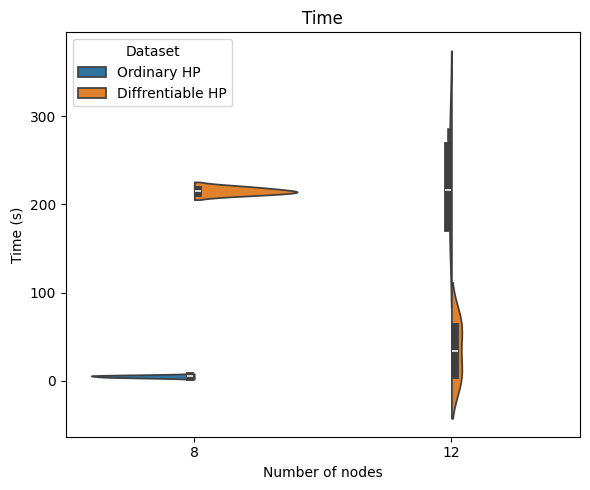

In [46]:
plot_all_time_subplots(d1, d2)

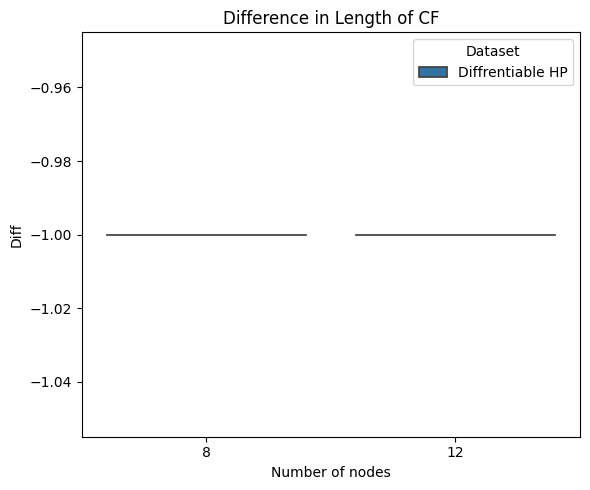

In [47]:
plot_all_diff_len_subplots(d1, d2)

In [48]:
d2[8][0]

{'time': 213.76474952697754,
 'cause': {'cf_X': {},
  'W': {0: tensor(-39.6307),
   1: tensor(0.),
   4: tensor(-11.0000),
   5: tensor(6.2053e-05)},
  'o': tensor(120.9995),
  'o_cf': np.float64(2071.36017826187)}}

[-1 -1 -1 -1]
[-1 -1 -1 -1]


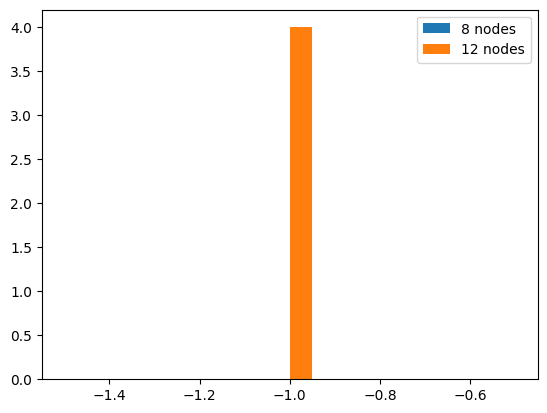

In [ ]:
for n in d1.keys():
    diffs = np.array([len(y['cause']['cf_X']) - len(x['cause']['cf_X']) for x,y in zip(d1[n],d2[n])])
    print(diffs)
    plt.hist(diffs, bins=20, label=f'{n} nodes')

plt.legend()

[97.57695099 65.05428717 98.37264264 80.29356235]
[97.49869356 91.78812222 73.27245524 98.6925671 ]


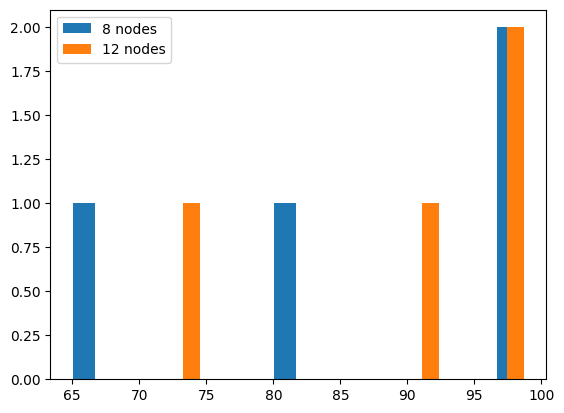

In [50]:
for n in d1.keys():
    diffs = np.array([x['cause']['o_cf']for x in d1[n]])
    print(diffs)
    plt.hist(diffs, bins=20, label=f'{n} nodes')

plt.legend()

[2071.36017826 9431.89815683  758.05803923 7411.99973054]
[121.         121.         121.00113304 228.41298439]


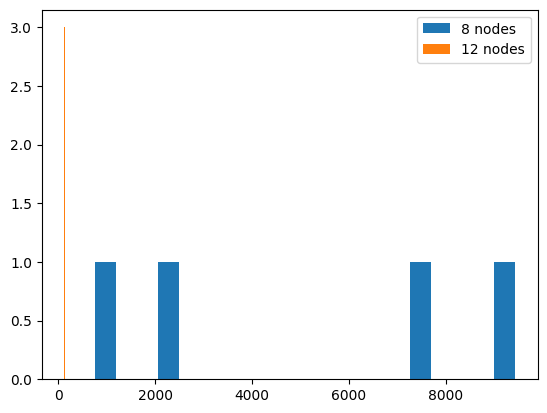

In [51]:
for n in d1.keys():
    diffs = np.array([x['cause']['o_cf']for x in d2[n]])
    print(diffs)
    plt.hist(diffs, bins=20, label=f'{n} nodes')

plt.legend()

[24 28 23 27]
[ 96.15846987 544.60238469  11.35521297 269.09627063]


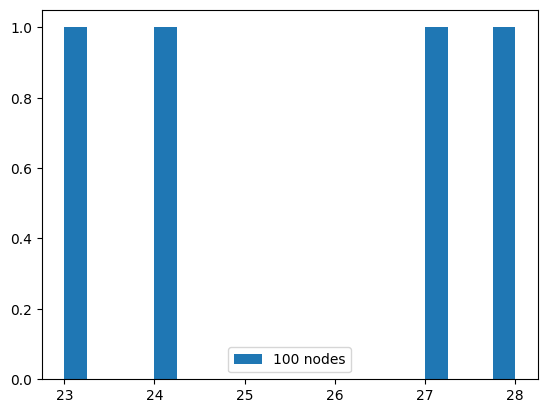

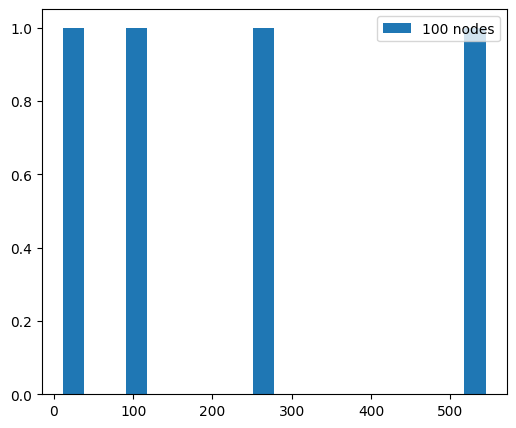

In [80]:
import pickle

fn = 'results/results_20250509_173334.pkl'
fn = 'results/results_20250509_185027.pkl'
fn = 'results/results_20250509_200811.pkl'
fn = 'results/results_20250509_203749.pkl'
fn = 'results/results_20250510_185547.pkl'
fn = 'results/results_20250510_191036.pkl'
fn = 'results/results_20250510_194920.pkl'

with open(fn, "rb") as f:
    data = pickle.load(f)
    # print(data[8][0])
    
d1 = defaultdict(list)
d2 = defaultdict(list)
for n, v in data.items():
    for i, x in enumerate(v):
        d1[n].append({"time": x["delta_hp"], "cause": x["a_cause_hp"]})
        d2[n].append({"time": x["delta_hp_nn"], "cause": x["a_cause_hp_nn"]})

for n in d1.keys():
    # diffs = np.array([len(y['cause']['cf_X']) - len(x['cause']['cf_X']) for x,y in zip(d1[n],d2[n])])
    diffs = np.array([len(y['cause']['cf_X']) for y in d2[n]])
    print(diffs)
    plt.hist(diffs, bins=20, label=f'{n} nodes')

plt.legend()

fig, axes = plt.subplots(nrows=len(d1.keys()), ncols=1, figsize=(6, 5))
if len(d1.keys()) == 1:
    axes = [axes]
for ni, n in enumerate(d1.keys()):
    diffs = np.array([x['cause']['o_cf']for x in d2[n]])
    print(diffs)
    axes[ni].hist(diffs, bins=20, label=f'{n} nodes')

plt.legend()